In [25]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [26]:

mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

nb_classes=10

X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,nb_classes])

W=tf.Variable(tf.random_normal([784,nb_classes]),name='weight')
b=tf.Variable(tf.random_normal([nb_classes]),name='bias')

hypothesis=tf.nn.softmax(tf.matmul(X,W)+b)
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epoch=15
batch_size=100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch:    1 cost = 2.953291735
Epoch:    2 cost = 1.118715210
Epoch:    3 cost = 0.891099251
Epoch:    4 cost = 0.778156879
Epoch:    5 cost = 0.706885718
Epoch:    6 cost = 0.657534900
Epoch:    7 cost = 0.620586316
Epoch:    8 cost = 0.591069290
Epoch:    9 cost = 0.567365777
Epoch:   10 cost = 0.547664141
Epoch:   11 cost = 0.530454126
Epoch:   12 cost = 0.515003451
Epoch:   13 cost = 0.502208270
Epoch:   14 cost = 0.489744154
Epoch:   15 cost = 0.479416160
Learning Finsh
Accuracy:  0.8882
Label:  [2]
Prediction:  [2]


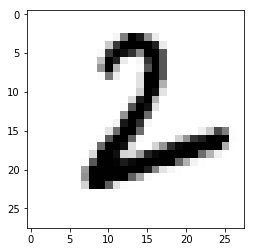

Label:  [6]
Prediction:  [6]


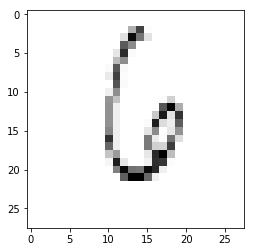

Label:  [6]
Prediction:  [6]


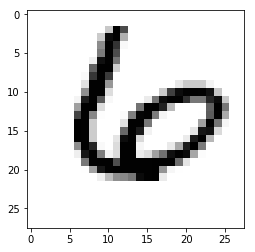

Label:  [1]
Prediction:  [1]


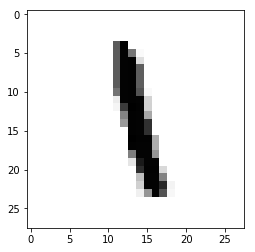

Label:  [8]
Prediction:  [3]


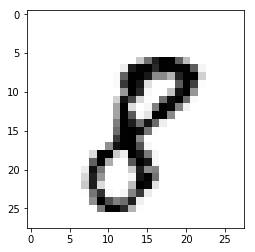

Label:  [5]
Prediction:  [5]


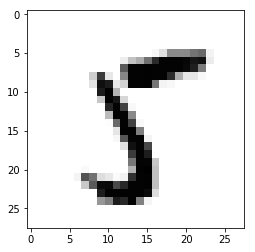

Label:  [1]
Prediction:  [1]


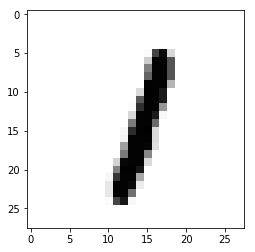

Label:  [5]
Prediction:  [5]


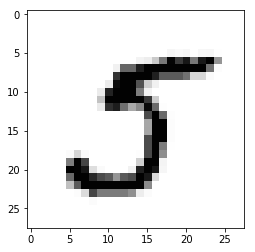

Label:  [8]
Prediction:  [8]


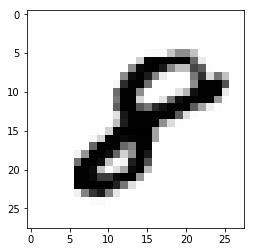

Label:  [4]
Prediction:  [4]


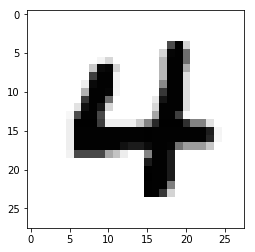

In [61]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost+=c/total_batch
            
        print('Epoch: {:4} cost = {:.9f}'.format(epoch+1,avg_cost))
        
    print('Learning Finsh')
    
    print('Accuracy: ',accuracy.eval(
        session=sess,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    for _ in range(10):
        r=random.randint(0,mnist.test.num_examples -1)
        print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
        print("Prediction: ",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

        plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
        plt.show()
    

In [63]:
'''with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
'''
r=random.randint(0,mnist.test.num_examples -1)
print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction: ",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

RuntimeError: Attempted to use a closed Session.